## BMI prediction

In [36]:
import cv2
import matplotlib.pyplot as plt
from keras.preprocessing import image
import pandas as pd

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


- !python bmi_prediction.py --input_csv="../human_detection/result/frcnn_result.csv" --image_path="../HKTVMall_data" --process_image_path="process_images" --model_path="model/4.053_model.h5"


In [39]:
!/anaconda/envs/azureml_py38_tensorflow/bin/python bmi_prediction.py --input_csv="../human_detection/result/frcnn_result.csv" --image_path="../HKTVMall_data" --process_image_path="process_images" --model_path="model/4.053_model.h5"


Reading raw input and processed images
2022-01-18 08:49:23.521623: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-01-18 08:49:25.042093: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 10792 MB memory:  -> device: 0, name: Tesla K80, pci bus id: 0001:00:00.0, compute capability: 3.7
Extracting features
2022-01-18 08:49:48.292083: I tensorflow/stream_executor/cuda/cuda_dnn.cc:366] Loaded cuDNN version 8101
2022-01-18 08:49:50.005798: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
Predicting BMI
Total time used: 60.90


In [37]:
def plot_image(image_path, process_path, image_id, bmi, show_process_image=False):
    raw_input_image = cv2.imread("%s/%d.jpg" % (image_path, image_id))
    raw_input_image = cv2.cvtColor(raw_input_image, cv2.COLOR_BGR2RGB)

    f, ax = plt.subplots(1,2)
    ax[0].imshow(raw_input_image)

    if show_process_image:
        preprocessed_input_image = image.load_img("%s/%d.png"% (process_path, image_id))
        ax[1].imshow(preprocessed_input_image)

    plt.title("Image %d, Predicted BMI: %.2f" % (image_id, bmi[bmi["image_id"] == image_id]["pred_bmi"]))

In [38]:
human_detect_res = pd.read_csv("../human_detection/result/frcnn_result.csv")
image_ids = human_detect_res[human_detect_res["pred_label"] == 1]["image_id"]

image_base_path = "../HKTVMall_data"
process_image_path = "process_images"

bmi_df = pd.read_csv("result/bmi_pred.csv")

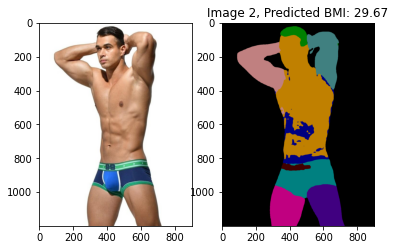

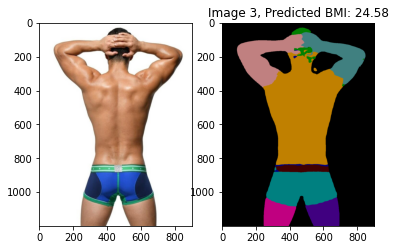

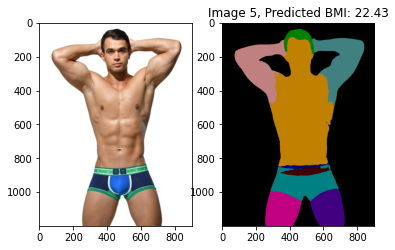

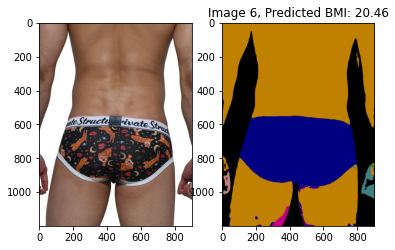

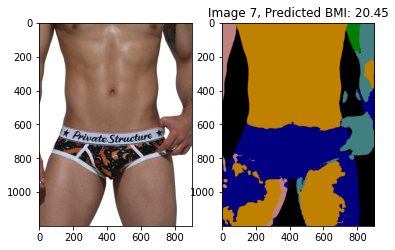

In [40]:
for image_id in image_ids[:5]:
    plot_image(image_base_path, process_image_path, image_id, bmi_df, show_process_image=True)